In [197]:
import logging, sys
import seaborn as sns
import pandas as pd
import sqlite3
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Load tweets from Database

In [198]:
try:
    connection = sqlite3.connect("../data/project.sqlite")
    tweets = pd.read_sql_query(f"SELECT * FROM tweets", connection)
except sqlite3.Error as e:
    logging.error(msg=f"Error while creating SQLite DB: {e}")
    sys.exit(1)
finally:
    connection.close()

Data Analysis

In [199]:
tweets.isnull().values.any()

False

<Axes: xlabel='target', ylabel='count'>

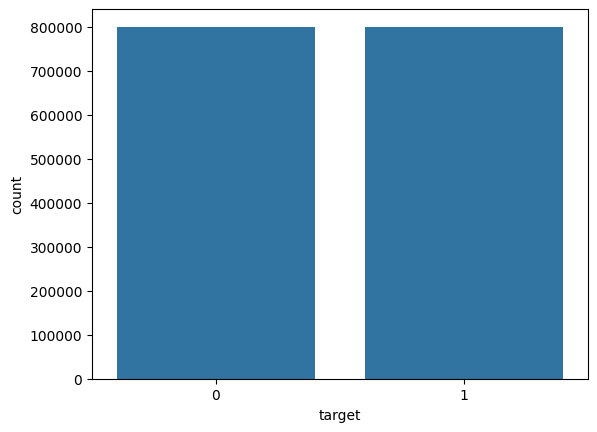

In [200]:
sns.countplot(x="target", data=tweets)

In [201]:
positive_tweet = tweets[tweets.target == 1]["processed_text"]
negative_tweet = tweets[tweets.target == 0]["processed_text"]
tweets[tweets.target == 1]["processed_text"].iloc[1]

'im meet one besti tonight cant wait girl talk'

(-0.5, 399.5, 199.5, -0.5)

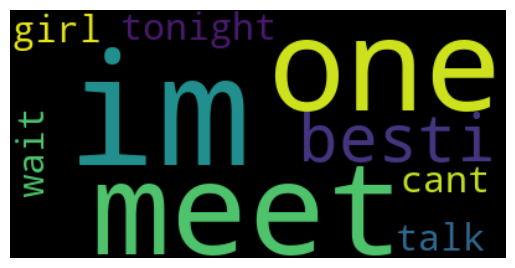

In [202]:
wordcloud = WordCloud().generate(positive_tweet.iloc[1])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

Data Preprocessing

In [203]:
tweets.iloc[0]["processed_text"]

'upset updat facebook text might cri result school today also blah'

In [204]:
X = tweets["processed_text"].values
Y = tweets["target"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

Convert text data into numerical data

In [205]:
print(X.shape, X_train.shape, X_test.shape)

(1599999,) (1279999,) (320000,)


In [206]:
vectorizer = TfidfVectorizer()

In [207]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [208]:
model = LogisticRegression(max_iter=1000)
print(X.shape, X_train.shape, X_test.shape)

(1599999,) (1279999, 191798) (320000, 191798)


In [209]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

In [210]:
X_train_prediction = model.predict(X_train)
training_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Training accuracy:", training_accuracy)

Training accuracy: 0.7924178065764114


In [211]:
X_test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.774853125


In [213]:
try:
    connection = sqlite3.connect("../data/project.sqlite")
    song_lyrics = pd.read_sql_query(f"SELECT * FROM song_lyrics", connection)
except sqlite3.Error as e:
    logging.error(msg=f"Error while creating SQLite DB: {e}")
    sys.exit(1)
finally:
    connection.close()

In [237]:
index = 500
data_point = song_lyrics[song_lyrics.song == "Barney Theme Song"]
actual_label = data_point["label"]
data_point = data_point["processed_lyrics"].values
data_point_vectorized = vectorizer.transform(data_point)
prediction = model.predict(data_point_vectorized)
print("Prediction: ", prediction, "Label on data: ", actual_label, "Lyrics: ", song_lyrics[song_lyrics.song == "Barney Theme Song"]["lyrics"].values)

Prediction:  [1] Label on data:  127747    0.998
Name: label, dtype: float64 Lyrics:  ["Barney is a dinosaur from our imagination\r\nAnd when he's tall\r\nHe's what we call a dinosaur sensation\r\nBarney's friends are big and small\r\nThey come from lots of places\r\nAfter school they meet to play\r\nAnd sing with happy faces\r\nBarney shows us lots of things\r\nLike how to play pretend\r\nABC's, and 123's\r\nAnd how to be a friend\r\nBarney comes to play with us\r\nWhenever we may need him\r\nBarney can be your friend too\r\nIf you just make-believe him!"]
